In [2]:
import pandas as pd
import numpy as np

In [3]:
datafile = pd.read_csv('cardiocleaned.csv')   #reading the cleaned dataset

label = datafile['cardio'].values   #  output y is separated in a list called as label
data = datafile.drop(['cardio'], axis = 1)    #input x is separated in form of Dataframe called as data 
datafile

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,male,168,62.0,110,80,chl_avg,glc_avg,0,0,1,0
1,20228,female,156,85.0,140,90,chl_high,glc_avg,0,0,1,1
2,18857,female,165,64.0,130,70,chl_high,glc_avg,0,0,0,1
3,17623,male,169,82.0,150,100,chl_avg,glc_avg,0,0,1,1
4,17474,female,156,56.0,100,60,chl_avg,glc_avg,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67741,19240,male,168,76.0,120,80,chl_avg,glc_avg,1,0,1,0
67742,22601,female,158,126.0,140,90,chl_aboveavg,glc_aboveavg,0,0,1,1
67743,19066,male,183,105.0,180,90,chl_high,glc_avg,0,1,0,1
67744,22431,female,163,72.0,135,80,chl_avg,glc_aboveavg,0,0,0,1


In [4]:
type(label)

numpy.ndarray

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
# split data into training, validation, testing data
from sklearn.model_selection import train_test_split   #class to split data

inputtrain, inputtest, outputtrain, outputtest = train_test_split(data, label, test_size = 0.2, stratify = label)
# inputtrain, inputcv, outputtrain, outputcv = train_test_split(inputtrain, outputtrain, test_size = 0.2, stratify = outputtrain)
# # cv = cross- validation


In [7]:
inputtrain.shape

(54196, 11)

In [8]:
# inputcv.shape

In [9]:
inputtest.shape

(13550, 11)

In [10]:
outputtrain.shape

(54196,)

In [11]:
outputtest.shape

(13550,)

In [12]:
type(inputtrain), type(outputtrain)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [13]:
inputtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46294,20175,male,183,107.0,120,80,chl_aboveavg,glc_high,1,1,1
53222,23206,male,168,75.0,110,80,chl_avg,glc_avg,0,0,1
26438,15553,male,169,76.0,120,80,chl_avg,glc_avg,0,0,0
46011,19760,female,159,59.0,140,90,chl_avg,glc_avg,0,0,0
7226,21866,male,174,65.0,150,90,chl_aboveavg,glc_aboveavg,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
53242,20624,male,170,69.0,120,80,chl_avg,glc_avg,0,0,0
40952,23211,female,162,79.0,130,80,chl_high,glc_avg,0,0,0
49652,20566,female,166,61.0,120,80,chl_avg,glc_avg,0,0,1
562,19692,female,160,57.0,150,90,chl_aboveavg,glc_avg,0,0,1


In [14]:
#scaling age (in days) (Numerical data) using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(inputtrain['age'].values.reshape(-1,1)) 

inputtrain_age = scale.transform(inputtrain[['age']])  
# inputcv_age = scale.transform(inputcv['age'].values.reshape(-1,1))
inputtest_age = scale.transform(inputtest['age'].values.reshape(-1,1))

/home/komal/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [15]:
type(inputtrain_age)

numpy.ndarray

In [16]:
inputtrain_age.shape

(54196, 1)

In [17]:
# inputcv_age.shape

In [18]:
type(outputtrain)

numpy.ndarray

In [19]:
outputtrain.shape

(54196,)

In [20]:
# convert gender (categorical data) into One Hot Encoding

from sklearn.feature_extraction.text import CountVectorizer  

vec = CountVectorizer()
vec.fit(inputtrain['gender'].values)

inputtrain_gender = vec.transform(inputtrain['gender'].values)  
# inputcv_gender = vec.transform(inputcv['gender'].values)
inputtest_gender = vec.transform(inputtest['gender'].values)


In [21]:
inputtrain_gender

<54196x2 sparse matrix of type '<class 'numpy.int64'>'
	with 54196 stored elements in Compressed Sparse Row format>

In [22]:
type(inputtrain_gender)   #reshape(-1,1) convert sparse csr matrix into nparray

scipy.sparse._csr.csr_matrix

In [23]:
type(inputtrain_gender.toarray())

numpy.ndarray

In [24]:
inputtrain_gender.toarray()

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [25]:
inputtrain_gender.toarray().shape

(54196, 2)

In [26]:
inputtrain_gender.shape

(54196, 2)

In [27]:
#scaling height (in cm) (Numerical data) using Min-Max Scaler

#from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(inputtrain['height'].values.reshape(-1,1)) 

inputtrain_height = scale.transform(inputtrain['height'].values.reshape(-1,1))  
# inputcv_height = scale.transform(inputcv['height'].values.reshape(-1,1))
inputtest_height = scale.transform(inputtest['height'].values.reshape(-1,1))

In [28]:
type(inputtrain_height)

numpy.ndarray

In [29]:
inputtrain_height.shape

(54196, 1)

In [30]:
inputtrain_height

array([[0.72413793],
       [0.55172414],
       [0.56321839],
       ...,
       [0.52873563],
       [0.45977011],
       [0.37931034]])

In [31]:
#scaling weight (in kg) (Numerical data) using Min-Max Scaler

#from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(inputtrain['weight'].values.reshape(-1,1)) 

inputtrain_weight = scale.transform(inputtrain['weight'].values.reshape(-1,1))  
# inputcv_weight = scale.transform(inputcv['weight'].values.reshape(-1,1))
inputtest_weight = scale.transform(inputtest['weight'].values.reshape(-1,1))

In [32]:
#scaling ap_lo (Numerical data) using Min-Max Scaler

#from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(inputtrain['ap_lo'].values.reshape(-1,1)) 

inputtrain_ap_lo = scale.transform(inputtrain['ap_lo'].values.reshape(-1,1))  
# inputcv_ap_lo = scale.transform(inputcv['ap_lo'].values.reshape(-1,1))
inputtest_ap_lo = scale.transform(inputtest['ap_lo'].values.reshape(-1,1))

In [33]:
# convert cholesterol (categorical data) into One Hot Encoding

#from sklearn.feature_extraction.text import CountVectorizer  

vec = CountVectorizer()
vec.fit(inputtrain['cholesterol'].values)

inputtrain_cholesterol = vec.transform(inputtrain['cholesterol'].values)  
# inputcv_cholesterol = vec.transform(inputcv['cholesterol'].values)
inputtest_cholesterol = vec.transform(inputtest['cholesterol'].values)

In [34]:
# convert glucose (categorical data) into One Hot Encoding

#from sklearn.feature_extraction.text import CountVectorizer  

vec = CountVectorizer()
vec.fit(inputtrain['gluc'].values)

inputtrain_gluc = vec.transform(inputtrain['gluc'].values)  
# inputcv_gluc = vec.transform(inputcv['gluc'].values)
inputtest_gluc = vec.transform(inputtest['gluc'].values)

In [35]:
# smoke (categorical data) binary only 0/1 (Yes/No) hence no need to convert into One Hot Encoding 

#just converting sparse csr matrix form in np array form

inputtrain_smoke = inputtrain['smoke'].values.reshape(-1,1)
# inputcv_smoke = inputcv['smoke'].values.reshape(-1,1)
inputtest_smoke = inputtest['smoke'].values.reshape(-1,1)

In [36]:
# active, smoke, alcohol (categorical data) binary only 0/1 (Yes/No) hence no need to convert into One Hot Encoding 

#just converting sparse csr matrix form in np array form

inputtrain_active = inputtrain['active'].values.reshape(-1,1)
inputtest_active = inputtest['active'].values.reshape(-1,1)

inputtrain_smoke = inputtrain['smoke'].values.reshape(-1,1)
inputtest_smoke = inputtest['smoke'].values.reshape(-1,1)

inputtrain_alco = inputtrain['alco'].values.reshape(-1,1)
inputtest_alco = inputtest['alco'].values.reshape(-1,1)

In [37]:
inputtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46294,20175,male,183,107.0,120,80,chl_aboveavg,glc_high,1,1,1
53222,23206,male,168,75.0,110,80,chl_avg,glc_avg,0,0,1
26438,15553,male,169,76.0,120,80,chl_avg,glc_avg,0,0,0
46011,19760,female,159,59.0,140,90,chl_avg,glc_avg,0,0,0
7226,21866,male,174,65.0,150,90,chl_aboveavg,glc_aboveavg,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
53242,20624,male,170,69.0,120,80,chl_avg,glc_avg,0,0,0
40952,23211,female,162,79.0,130,80,chl_high,glc_avg,0,0,0
49652,20566,female,166,61.0,120,80,chl_avg,glc_avg,0,0,1
562,19692,female,160,57.0,150,90,chl_aboveavg,glc_avg,0,0,1


In [38]:
type(inputtrain_smoke)

numpy.ndarray

In [39]:
inputtrain_smoke.shape

(54196, 1)

In [40]:
type(inputtrain_active)

numpy.ndarray

In [41]:
inputtrain_active.shape

(54196, 1)

In [42]:
# stack arrays horizontally

from scipy.sparse import hstack

input_train = hstack((inputtrain_age, inputtrain_gender, inputtrain_height, inputtrain_weight, inputtrain_cholesterol, inputtrain_gluc, inputtrain_smoke , inputtrain_alco,inputtrain_active))
# cv = hstack((inputcv_age, inputcv_gender, inputcv_height, inputcv_weight, inputcv_cholesterol, inputcv_gluc, inputcv_active))
input_test = hstack((inputtest_age, inputtest_gender, inputtest_height, inputtest_weight, inputtest_cholesterol, inputtest_gluc,inputtest_smoke, inputtest_alco , inputtest_active))

In [43]:
input_train

<54196x14 sparse matrix of type '<class 'numpy.float64'>'
	with 375981 stored elements in COOrdinate format>

In [44]:
input_train = input_train.toarray()
input_test = input_test.toarray()

In [45]:
outputtrain

array([0, 1, 0, ..., 0, 1, 0])

In [46]:
input_train.shape   #input data

(54196, 14)

In [47]:
# cv.shape     #input data

In [48]:
input_test.shape     #input data

(13550, 14)

In [49]:
outputtrain.shape, outputtest.shape

((54196,), (13550,))

In [50]:
type(outputtrain), type(outputtest)

(numpy.ndarray, numpy.ndarray)

In [51]:
outputtrain = outputtrain.reshape(-1,1)
outputtest = outputtest.reshape(-1,1)

In [52]:
outputtrain = outputtrain.ravel()

In [53]:
type(outputtrain), type(outputtest)

(numpy.ndarray, numpy.ndarray)

In [54]:
outputtrain.shape, outputtest.shape

((54196,), (13550, 1))

In [55]:
###### Decision Tree

In [60]:
import math
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
neigh = DecisionTreeClassifier()

In [62]:
parameters = {'max_depth': [1,5,10,100,500,1000], 'min_samples_split': [2,5,10,100,500]}

In [66]:
clf = GridSearchCV(neigh, parameters, cv =3, scoring = 'roc_auc', return_train_score = True)

In [67]:
clf.fit(input_train,outputtrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 100, 500, 1000],
                         'min_samples_split': [2, 5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [68]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [69]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.016625,0.002360,0.004792,0.001461,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,1.216078e-03
1,0.009847,0.000138,0.002955,0.000583,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,1.216078e-03
2,0.010510,0.001436,0.002911,0.001149,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,1.216078e-03
3,0.010370,0.000288,0.003155,0.000718,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,1.216078e-03
4,0.009568,0.000148,0.002622,0.000904,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,1.216078e-03
5,0.030980,0.000196,0.003560,0.000888,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.689370,0.690463,0.687820,0.689218,0.001085,3,0.695568,0.695780,0.697131,0.696160,6.920181e-04
6,0.030198,0.000239,0.003450,0.000708,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.688927,0.690463,0.687820,0.689070,0.001084,4,0.695568,0.695780,0.697131,0.696160,6.920181e-04
7,0.030210,0.000022,0.003347,0.000808,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.688927,0.690463,0.687820,0.689070,0.001084,4,0.695568,0.695780,0.697131,0.696160,6.920181e-04
8,0.030216,0.000050,0.003440,0.000793,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.689208,0.690829,0.687962,0.689333,0.001174,2,0.695454,0.695694,0.697044,0.696064,6.998063e-04
9,0.030208,0.000112,0.003403,0.000828,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.689208,0.691042,0.687888,0.689379,0.001294,1,0.695454,0.695557,0.697001,0.696004,7.065106e-04


In [70]:
results = results.sort_values(['param_max_depth'])

In [71]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.016625,0.002360,0.004792,0.001461,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,0.001216
1,0.009847,0.000138,0.002955,0.000583,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,0.001216
2,0.010510,0.001436,0.002911,0.001149,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,0.001216
3,0.010370,0.000288,0.003155,0.000718,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,0.001216
4,0.009568,0.000148,0.002622,0.000904,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.590194,0.591291,0.585671,0.589052,0.002432,17,0.588481,0.587933,0.590743,0.589052,0.001216


In [72]:
print("TRAIN SCORE")

TRAIN SCORE


In [74]:
r1 = results.pivot(index ="param_max_depth", columns =  "param_min_samples_split", values = "mean_train_score")

<Axes: xlabel='param_min_samples_split', ylabel='param_max_depth'>

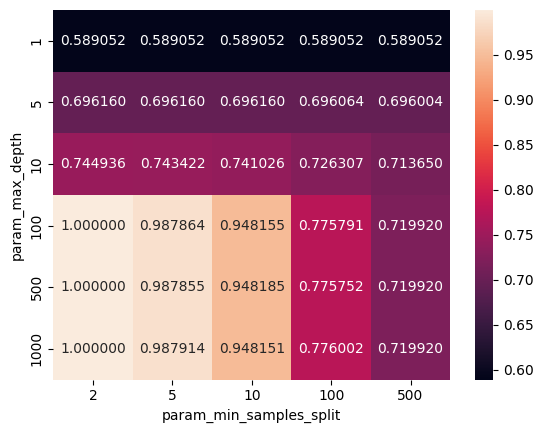

In [75]:
sns.heatmap(r1, annot = True, fmt = 'f')

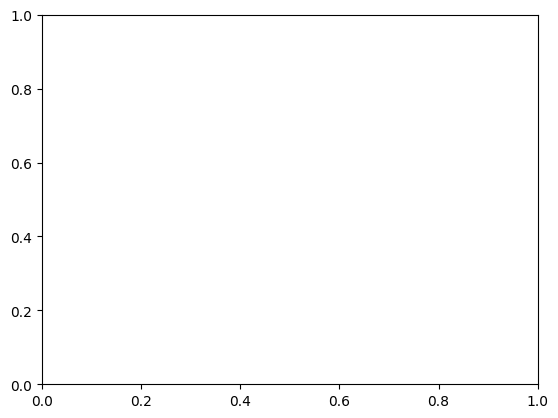

In [77]:
b,t = plt.ylim() # discover the values for bottom and top

In [78]:
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the bottom

/tmp/ipykernel_1075/3951547686.py:1: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(b,t)   # update the ylim(bottom, top) values


(0.475, 0.525)

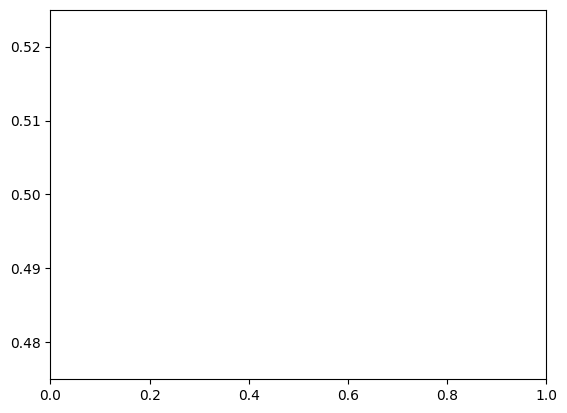

In [79]:
plt.ylim(b,t)   # update the ylim(bottom, top) values

In [81]:
plt.show()

In [82]:
print("TEST SCORE")

TEST SCORE


In [83]:
r2 = results.pivot(index ="param_max_depth", columns =  "param_min_samples_split", values = "mean_test_score")

<Axes: xlabel='param_min_samples_split', ylabel='param_max_depth'>

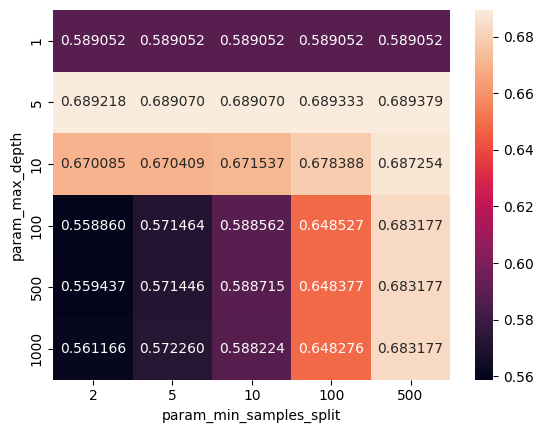

In [84]:
sns.heatmap(r2, annot = True, fmt = 'f')

In [85]:
plt.show()

In [86]:
print(clf.best_params_)

{'max_depth': 5, 'min_samples_split': 500}


In [88]:
print(clf.best_score_)

0.6893794112577102


In [89]:
#####################

In [90]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [91]:
neigh= DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)
neigh.fit(input_train, outputtrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=500)

In [94]:
y_pred_train = neigh.predict_proba(input_train)[:,1]
y_pred_test = neigh.predict_proba(input_test)[:,1]